# MTA Analysis

## Cleaning

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
#from sqlalchemy import create_engine

In [228]:
#engine_19 = create_engine('sqlite:///mta_data_2019.db')
#turnstiles_2019 = pd.read_sql('SELECT * FROM mta_data;', engine_19)
#turnstiles_2019.head()

#engine_20 = create_engine('sqlite:///mta_data_2020.db')
#turnstiles_2020 = pd.read_sql('SELECT * FROM mta_data;', engine_20)

#engine_21 = create_engine('sqlite:///mta_data_2021.db')
#turnstiles_2021 = pd.read_sql('SELECT * FROM mta_data;', engine_21)


In [229]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

week_nums1 = [190105, 190112, 190119, 190126, 190202, 190209, 190216, 190223, 190302, 190309, 190316, 190323, 190330,
             190406, 190413, 190420, 190427, 190504, 190511, 190518, 190525, 190601, 190608, 190615, 190622, 190629]
turnstiles_2019 = get_data(week_nums1)

week_nums2 = [200104, 200111, 200118, 200125, 200201, 200208, 200215, 200222, 200229, 200307, 
             200314, 200321, 200328, 200404, 200411, 200418, 200425, 200502, 
            200509, 200516, 200523, 200530, 200606, 200613, 200620, 200627]
turnstiles_2020 = get_data(week_nums2)

week_nums3 = [210102, 210109, 210116, 210123, 210130, 210206, 210213, 210220, 210227, 210306, 210313, 210320, 
             210327, 210403, 210410, 210417, 210424, 210501, 210508, 210515, 210522, 210529, 210605, 210612, 
             210619, 210626]
turnstiles_2021 = get_data(week_nums3)



In [230]:
turnstiles_2020.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713


In [231]:
turnstiles_2020.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [232]:
turnstiles_2019.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,2335936
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,11:00:00,REGULAR,6889364,2336038
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,15:00:00,REGULAR,6889605,2336101
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,19:00:00,REGULAR,6889966,2336173


In [233]:
turnstiles_2021.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689


In [234]:
# Fix white space in columns
turnstiles_2020.columns = [column.strip() for column in turnstiles_2020.columns]
turnstiles_2019.columns = [column.strip() for column in turnstiles_2019.columns]
turnstiles_2021.columns = [column.strip() for column in turnstiles_2021.columns]
turnstiles_2020.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [235]:
# Make columns lowercase
turnstiles_2019.columns = [column.lower() for column in turnstiles_2019.columns]
turnstiles_2020.columns = [column.lower() for column in turnstiles_2020.columns]
turnstiles_2021.columns = [column.lower() for column in turnstiles_2021.columns]
turnstiles_2020.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [236]:
# About 6 months of data
turnstiles_2019.date.value_counts().sort_index()

01/01/2019    28742
01/02/2019    28691
01/03/2019    28584
01/04/2019    29388
01/05/2019    28619
              ...  
06/27/2019    29464
06/28/2019    29779
12/29/2018    28591
12/30/2018    28648
12/31/2018    28959
Name: date, Length: 182, dtype: int64

In [237]:
turnstiles_2020.date.value_counts().sort_index()

01/01/2020    29428
01/02/2020    30048
01/03/2020    29261
01/04/2020    29439
01/05/2020    29848
              ...  
06/26/2020    29476
12/28/2019    29437
12/29/2019    29384
12/30/2019    29607
12/31/2019    29334
Name: date, Length: 182, dtype: int64

In [238]:
turnstiles_2021.date.value_counts().sort_index()

01/01/2021    30696
01/02/2021    30595
01/03/2021    29807
01/04/2021    29779
01/05/2021    29802
              ...  
12/27/2020    29971
12/28/2020    30150
12/29/2020    29877
12/30/2020    29953
12/31/2020    29976
Name: date, Length: 182, dtype: int64

In [239]:
import datetime

In [240]:
# Get date and time into one column
turnstiles_2019['date_time'] = pd.to_datetime(turnstiles_2019.date + ' ' + turnstiles_2019.time, 
                                                format = '%m/%d/%Y %H:%M:%S')

turnstiles_2020['date_time'] = pd.to_datetime(turnstiles_2020.date + ' ' + turnstiles_2020.time, 
                                                format = '%m/%d/%Y %H:%M:%S')

turnstiles_2021['date_time'] = pd.to_datetime(turnstiles_2021.date + ' ' + turnstiles_2021.time, 
                                                format = '%m/%d/%Y %H:%M:%S')

In [241]:
turnstiles_2020.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,2019-12-28 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,2019-12-28 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594,2019-12-28 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647,2019-12-28 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713,2019-12-28 19:00:00


In [242]:
# Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_2020
 .groupby(["c/a", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(5)

,c/a,unit,scp,station,date_time,entries
4826233,R514,R094,00-05-00,ASTORIA BLVD,2020-01-18 15:00:00,2
4826231,R514,R094,00-05-00,ASTORIA BLVD,2020-01-18 07:00:00,2
4826238,R514,R094,00-05-00,ASTORIA BLVD,2020-01-19 11:00:00,2
4826237,R514,R094,00-05-00,ASTORIA BLVD,2020-01-19 07:00:00,2
4826236,R514,R094,00-05-00,ASTORIA BLVD,2020-01-19 03:00:00,2


In [243]:
# Seems like many duplicates? Check the first one
mask = ((turnstiles_2020['c/a'] == 'R514') &
        (turnstiles_2020.unit == 'R094') &
        (turnstiles_2020.scp == '00-05-00') &
        (turnstiles_2020.station == 'ASTORIA BLVD') &
        (turnstiles_2020.date_time.dt.date == datetime.datetime(2020, 1, 18).date()))

turnstiles_2020[mask].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
184467,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,03:00:00,REGULAR,15,0,2020-01-18 03:00:00
184468,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,03:00:00,RECOVR AUD,16,0,2020-01-18 03:00:00
184469,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,07:00:00,REGULAR,15,0,2020-01-18 07:00:00
184470,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,07:00:00,RECOVR AUD,16,0,2020-01-18 07:00:00
184471,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,11:00:00,REGULAR,15,0,2020-01-18 11:00:00


In [244]:
turnstiles_2020[mask].shape

(12, 12)

In [245]:
# Since only 12 rows, check all
turnstiles_2020[mask]

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
184467,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,03:00:00,REGULAR,15,0,2020-01-18 03:00:00
184468,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,03:00:00,RECOVR AUD,16,0,2020-01-18 03:00:00
184469,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,07:00:00,REGULAR,15,0,2020-01-18 07:00:00
184470,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,07:00:00,RECOVR AUD,16,0,2020-01-18 07:00:00
184471,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,11:00:00,REGULAR,15,0,2020-01-18 11:00:00
184472,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,11:00:00,RECOVR AUD,16,0,2020-01-18 11:00:00
184473,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,15:00:00,REGULAR,15,0,2020-01-18 15:00:00
184474,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,15:00:00,RECOVR AUD,16,0,2020-01-18 15:00:00
184475,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,19:00:00,REGULAR,15,0,2020-01-18 19:00:00
184476,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,01/18/2020,19:00:00,RECOVR AUD,16,0,2020-01-18 19:00:00


#### --> Incorrect AUD entries. These are all because of 0 exits. Keep the regular ones?


In [246]:
turnstiles_2020.desc.value_counts()

REGULAR       5345433
RECOVR AUD      21341
Name: desc, dtype: int64

In [247]:
(turnstiles_2020
 .groupby(["c/a", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).shape

(5366741, 6)

In [248]:
# Drop recovered rows (duplicates)
turnstiles_2019.sort_values(['c/a', 'unit', 'scp', 'station', 'date_time'], inplace=True, ascending=False)
turnstiles_2019.drop_duplicates(subset=['c/a', 'unit', 'scp', 'station', 'date_time'], inplace=True)

turnstiles_2020.sort_values(['c/a', 'unit', 'scp', 'station', 'date_time'], inplace=True, ascending=False)
turnstiles_2020.drop_duplicates(subset=['c/a', 'unit', 'scp', 'station', 'date_time'], inplace=True)

turnstiles_2021.sort_values(['c/a', 'unit', 'scp', 'station', 'date_time'], inplace=True, ascending=False)
turnstiles_2021.drop_duplicates(subset=['c/a', 'unit', 'scp', 'station', 'date_time'], inplace=True)

In [249]:
# Check for duplicates again
(turnstiles_2020
 .groupby(["c/a", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(5)

,c/a,unit,scp,station,date_time,entries
0,A002,R051,02-00-00,59 ST,2019-12-28 03:00:00,1
3577815,R141,R031,00-00-00,34 ST-PENN STA,2020-01-04 07:00:00,1
3577833,R141,R031,00-00-00,34 ST-PENN STA,2020-01-07 11:00:00,1
3577832,R141,R031,00-00-00,34 ST-PENN STA,2020-01-07 07:00:00,1
3577831,R141,R031,00-00-00,34 ST-PENN STA,2020-01-06 23:00:00,1


#### --> Duplicates gone?

In [250]:
# Get rid of December dates from previous year
turnstiles_2019['year'] = pd.DatetimeIndex(turnstiles_2019.date_time).year
turnstiles_2019 = turnstiles_2019[turnstiles_2019.year == 2019]

turnstiles_2020['year'] = pd.DatetimeIndex(turnstiles_2020.date_time).year
turnstiles_2020 = turnstiles_2020[turnstiles_2020.year == 2020]

turnstiles_2021['year'] = pd.DatetimeIndex(turnstiles_2021.date_time).year
turnstiles_2021 = turnstiles_2021[turnstiles_2021.year == 2021]

In [251]:
turnstiles_2020.year.unique()

array([2020])

In [252]:
turnstiles_2019.year.unique()

array([2019])

In [253]:
turnstiles_2021.year.unique()

array([2021])

In [254]:
# Just in case, but not necessary
def drop_year(date):
    if '2019' in date:
        print('MISTAKE')
    return None

date_test = turnstiles_2020.date.map(drop_year)
date_test.unique()

array([None], dtype=object)

## Daily rides in total

In [255]:
turnstiles_2019['prev_date'] = turnstiles_2019.groupby(['c/a', 'unit', 'scp', 'station']).date.shift(-1)
turnstiles_2019['prev_entries'] = turnstiles_2019.groupby(['c/a', 'unit', 'scp', 'station']).entries.shift(-1)

In [256]:
turnstiles_2020['prev_date'] = turnstiles_2020.groupby(['c/a', 'unit', 'scp', 'station']).date.shift(-1)
turnstiles_2020['prev_entries'] = turnstiles_2020.groupby(['c/a', 'unit', 'scp', 'station']).entries.shift(-1)

In [257]:
turnstiles_2021['prev_date'] = turnstiles_2021.groupby(['c/a', 'unit', 'scp', 'station']).date.shift(-1)
turnstiles_2021['prev_entries'] = turnstiles_2021.groupby(['c/a', 'unit', 'scp', 'station']).entries.shift(-1)

In [258]:
turnstiles_2019.sort_values(['c/a', 'unit', 'scp', 'station', 'date_time'])

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,year,prev_date,prev_entries
18,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2019,03:00:00,REGULAR,6891983,2336751,2019-01-01 03:00:00,2019,NaN,NaN
19,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2019,07:00:00,REGULAR,6891992,2336763,2019-01-01 07:00:00,2019,01/01/2019,6891983.0
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2019,11:00:00,REGULAR,6892033,2336808,2019-01-01 11:00:00,2019,01/01/2019,6891992.0
21,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2019,15:00:00,REGULAR,6892153,2336829,2019-01-01 15:00:00,2019,01/01/2019,6892033.0
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2019,19:00:00,REGULAR,6892299,2336870,2019-01-01 19:00:00,2019,01/01/2019,6892153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205958,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,05:00:00,REGULAR,5554,379,2019-06-28 05:00:00,2019,06/28/2019,5554.0
205959,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,09:00:00,REGULAR,5554,379,2019-06-28 09:00:00,2019,06/28/2019,5554.0
205960,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,13:00:00,REGULAR,5554,379,2019-06-28 13:00:00,2019,06/28/2019,5554.0
205961,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,17:00:00,REGULAR,5554,379,2019-06-28 17:00:00,2019,06/28/2019,5554.0


In [259]:
turnstiles_2020.sort_values(['c/a', 'unit', 'scp', 'station', 'date_time'])

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,year,prev_date,prev_entries
24,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,03:00:00,REGULAR,7328037,2483731,2020-01-01 03:00:00,2020,NaN,NaN
25,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,07:00:00,REGULAR,7328044,2483742,2020-01-01 07:00:00,2020,01/01/2020,7328037.0
26,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,11:00:00,REGULAR,7328075,2483781,2020-01-01 11:00:00,2020,01/01/2020,7328044.0
27,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,15:00:00,REGULAR,7328193,2483821,2020-01-01 15:00:00,2020,01/01/2020,7328075.0
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,19:00:00,REGULAR,7328375,2483878,2020-01-01 19:00:00,2020,01/01/2020,7328193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206666,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/26/2020,05:00:00,REGULAR,5554,514,2020-06-26 05:00:00,2020,06/26/2020,5554.0
206667,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/26/2020,09:00:00,REGULAR,5554,514,2020-06-26 09:00:00,2020,06/26/2020,5554.0
206668,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/26/2020,13:00:00,REGULAR,5554,514,2020-06-26 13:00:00,2020,06/26/2020,5554.0
206669,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/26/2020,17:00:00,REGULAR,5554,514,2020-06-26 17:00:00,2020,06/26/2020,5554.0


In [260]:
turnstiles_2021.sort_values(['c/a', 'unit', 'scp', 'station', 'date_time'])

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,year,prev_date,prev_entries
37,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,03:00:00,REGULAR,7511448,2558786,2021-01-01 03:00:00,2021,NaN,NaN
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,07:00:00,REGULAR,7511451,2558789,2021-01-01 07:00:00,2021,01/01/2021,7511448.0
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,11:00:00,REGULAR,7511461,2558813,2021-01-01 11:00:00,2021,01/01/2021,7511451.0
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,15:00:00,REGULAR,7511495,2558831,2021-01-01 15:00:00,2021,01/01/2021,7511461.0
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2021,19:00:00,REGULAR,7511620,2558857,2021-01-01 19:00:00,2021,01/01/2021,7511495.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209406,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/25/2021,05:00:00,REGULAR,5554,584,2021-06-25 05:00:00,2021,06/25/2021,5554.0
209407,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/25/2021,09:00:00,REGULAR,5554,584,2021-06-25 09:00:00,2021,06/25/2021,5554.0
209408,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/25/2021,13:00:00,REGULAR,5554,584,2021-06-25 13:00:00,2021,06/25/2021,5554.0
209409,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/25/2021,17:00:00,REGULAR,5554,584,2021-06-25 17:00:00,2021,06/25/2021,5554.0


In [261]:
# Drop rows for earliest dates
turnstiles_2019.dropna(subset = ['prev_date'], axis=0, inplace=True)
turnstiles_2020.dropna(subset = ['prev_date'], axis=0, inplace=True)
turnstiles_2021.dropna(subset = ['prev_date'], axis=0, inplace=True)

In [262]:
turnstiles_2020[turnstiles_2020['entries'] < turnstiles_2020['prev_entries']].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,year,prev_date,prev_entries
205818,TRAM1,R468,00-00-01,RIT-MANHATTAN,R,RIT,04/14/2020,09:00:00,REGULAR,13,7,2020-04-14 09:00:00,2020,04/13/2020,2.686670e+05
204865,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/26/2020,21:00:00,REGULAR,1559850657,1728223762,2020-06-26 21:00:00,2020,06/26/2020,1.559851e+09
204864,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/26/2020,17:00:00,REGULAR,1559850673,1728223747,2020-06-26 17:00:00,2020,06/26/2020,1.559851e+09
204863,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/26/2020,13:00:00,REGULAR,1559850704,1728223725,2020-06-26 13:00:00,2020,06/26/2020,1.559851e+09
204862,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/26/2020,09:00:00,REGULAR,1559850741,1728223719,2020-06-26 09:00:00,2020,06/26/2020,1.559851e+09


In [263]:
turnstiles_2020[turnstiles_2020['entries'] < turnstiles_2020['prev_entries']].shape

(43515, 15)

In [264]:
turnstiles_2019[turnstiles_2019['entries'] < turnstiles_2019['prev_entries']].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,year,prev_date,prev_entries
204055,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/28/2019,21:00:00,REGULAR,1559961242,1728177840,2019-06-28 21:00:00,2019,06/28/2019,1.559961e+09
204054,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/28/2019,17:00:00,REGULAR,1559961284,1728177775,2019-06-28 17:00:00,2019,06/28/2019,1.559961e+09
204053,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/28/2019,13:00:00,REGULAR,1559961371,1728177727,2019-06-28 13:00:00,2019,06/28/2019,1.559961e+09
204052,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/28/2019,09:00:00,REGULAR,1559961443,1728177716,2019-06-28 09:00:00,2019,06/28/2019,1.559962e+09
204051,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/28/2019,05:00:00,REGULAR,1559961680,1728177700,2019-06-28 05:00:00,2019,06/28/2019,1.559962e+09


In [265]:
mask = ((turnstiles_2020['c/a'] == 'R730') &
       (turnstiles_2020['unit'] == 'R431') &
       (turnstiles_2020['scp'] == '00-00-04') &
       (turnstiles_2020['station'] == 'EASTCHSTER/DYRE') &
       (turnstiles_2020['date_time'].dt.date == datetime.datetime(2020, 6, 26).date()))
turnstiles_2020[mask].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,year,prev_date,prev_entries
204865,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/26/2020,21:00:00,REGULAR,1559850657,1728223762,2020-06-26 21:00:00,2020,06/26/2020,1.559851e+09
204864,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/26/2020,17:00:00,REGULAR,1559850673,1728223747,2020-06-26 17:00:00,2020,06/26/2020,1.559851e+09
204863,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/26/2020,13:00:00,REGULAR,1559850704,1728223725,2020-06-26 13:00:00,2020,06/26/2020,1.559851e+09
204862,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/26/2020,09:00:00,REGULAR,1559850741,1728223719,2020-06-26 09:00:00,2020,06/26/2020,1.559851e+09
204861,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,06/26/2020,05:00:00,REGULAR,1559850781,1728223707,2020-06-26 05:00:00,2020,06/26/2020,1.559851e+09


#### --> Counter working in reverse

In [266]:
(turnstiles_2020[turnstiles_2020['entries'] < turnstiles_2020['prev_entries']]
    .groupby(['c/a', 'unit', 'scp', 'station']).size())

c/a    unit  scp       station        
A002   R051  02-06-00  59 ST                 1
A006   R079  00-00-04  5 AV/59 ST            1
             00-03-00  5 AV/59 ST            1
A007   R079  01-06-03  5 AV/59 ST            1
A011   R080  01-03-00  57 ST-7 AV         1050
                                          ... 
R726   R329  00-00-01  MORRIS PARK           1
             00-00-02  MORRIS PARK           1
R729   R292  00-00-01  BAYCHESTER AV         2
R730   R431  00-00-04  EASTCHSTER/DYRE     982
TRAM1  R468  00-00-01  RIT-MANHATTAN         1
Length: 436, dtype: int64

In [267]:
def get_daily_counts(row, max_counter):
    counter = row['entries'] - row['prev_entries']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row['entries'], row['prev_entries'])
        return 0
    return counter

_ = turnstiles_2020.apply(get_daily_counts, axis=1, max_counter=10000)

65674 12466.0
13 268667.0
50 7740099.0
120 1506659856.0
1 458910.0
1441835 1337351.0
0 517817.0
81 6163437.0
7915394 116876.0
24 2562789.0
22 1311420.0
23 5309695.0
21 20604.0
16050 114828.0
6117976 39945.0
20 4362577.0
230 5596546.0
31 517645.0
7704491 24577.0
20870 2557809.0
3 100350.0
31 15484086.0
434 2517652.0
104 15209650.0
0 102209.0
823394345 34982.0
14 825738.0
23 585146.0
28 14787119.0
20 5711070.0
18 3083086.0
8676804 13640277.0
13640277 8675910.0
1703967 17387249.0
173 13908992.0
15 6666024.0
7 73869.0
169 31896.0
351262 2251707.0
2246921 349408.0
162927 12340260.0
12337064 162062.0
115671 11006241.0
11003548 115050.0
931712 3238804.0
3237291 931289.0
4514240 1775604.0
1774017 4513916.0
2526452 247166.0
245576 2525940.0
1245219 40728.0
115 5359850.0
29 185964.0
7 1536055.0
1006685084 3932619.0
10 1349742.0
51627403 318991420.0
637537550 2493709.0
100695186 430716.0
51 2944820.0
50 5698151.0
671112280 2664539.0
524397 135382887.0
8 13681629.0
555290572 421603550.0
207975 196

3250903 3236737.0
2812043 2798909.0
4589796 4578680.0
458756 524481.0
1029 426732.0
14 26909.0
20 8800439.0
26 999938.0
36 5675074.0
2031652 368226.0
35 53415.0
21 8235039.0
294 6612372.0
10 126404.0
209 1091335.0
3 563309.0
6 6777431.0
106 1203855.0
4 7251359.0
1220289 1280320.0
848 1180887.0
1280649 1219821.0
524288 0.0
15519132 5554054.0
5554054 15517522.0
11525743 67822764.0
67822764 11523931.0
14849611 16141430.0
16141430 14847478.0
13799444 28135572.0
28135572 13797098.0
5276291 28448967.0
28448967 5274455.0
0 1562921352.0
4 7832211.0
60 9438081.0
22 7896805.0
43 83074.0
524289 158.0


In [268]:
def get_daily_counts(row, max_counter):
    counter = row['entries'] - row['prev_entries']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row['entries'], row['prev_entries'])
        counter = min(row['entries'], row['prev_entries'])
    if counter > max_counter:
        return 0
    return counter

turnstiles_2020['daily_entries'] = turnstiles_2020.apply(get_daily_counts, axis=1, max_counter=10000)

65674 12466.0
13 268667.0
50 7740099.0
120 1506659856.0
1 458910.0
1441835 1337351.0
0 517817.0
81 6163437.0
7915394 116876.0
24 2562789.0
22 1311420.0
23 5309695.0
21 20604.0
16050 114828.0
6117976 39945.0
20 4362577.0
230 5596546.0
31 517645.0
7704491 24577.0
20870 2557809.0
3 100350.0
31 15484086.0
434 2517652.0
104 15209650.0
0 102209.0
823394345 34982.0
14 825738.0
23 585146.0
28 14787119.0
20 5711070.0
18 3083086.0
8676804 13640277.0
13640277 8675910.0
1703967 17387249.0
173 13908992.0
15 6666024.0
7 73869.0
169 31896.0
351262 2251707.0
2246921 349408.0
162927 12340260.0
12337064 162062.0
115671 11006241.0
11003548 115050.0
931712 3238804.0
3237291 931289.0
4514240 1775604.0
1774017 4513916.0
2526452 247166.0
245576 2525940.0
1245219 40728.0
115 5359850.0
29 185964.0
7 1536055.0
1006685084 3932619.0
10 1349742.0
51627403 318991420.0
637537550 2493709.0
100695186 430716.0
51 2944820.0
50 5698151.0
671112280 2664539.0
524397 135382887.0
8 13681629.0
555290572 421603550.0
207975 196

3250903 3236737.0
2812043 2798909.0
4589796 4578680.0
458756 524481.0
1029 426732.0
14 26909.0
20 8800439.0
26 999938.0
36 5675074.0
2031652 368226.0
35 53415.0
21 8235039.0
294 6612372.0
10 126404.0
209 1091335.0
3 563309.0
6 6777431.0
106 1203855.0
4 7251359.0
1220289 1280320.0
848 1180887.0
1280649 1219821.0
524288 0.0
15519132 5554054.0
5554054 15517522.0
11525743 67822764.0
67822764 11523931.0
14849611 16141430.0
16141430 14847478.0
13799444 28135572.0
28135572 13797098.0
5276291 28448967.0
28448967 5274455.0
0 1562921352.0
4 7832211.0
60 9438081.0
22 7896805.0
43 83074.0
524289 158.0


In [269]:
_ = turnstiles_2019.apply(get_daily_counts, axis=1, max_counter=10000)

1129054485 2501642.0
2063648840 8123329.0
16 12846702.0
3769 6861700.0
649 9638103.0
12461 1752692.0
84 10463114.0
4084 19292.0
47 6721101.0
142 10993219.0
6 1488298.0
170 374903.0
59 1526472.0
333 166346.0
5 873860.0
125 28711.0
73 2301788.0
2301788 592439.0
589889 67610363.0
13257 1905727.0
5 2876591.0
16 1848584.0
7 13653626.0
684523539 409931.0
92 851779.0
269 416204.0
1844533418 10413899.0
458854 868286381.0
868286442 101740358.0
1468927 777312.0
32 212514.0
21 16983427.0
16983427 6089572.0
6089572 37494496.0
17 2157223.0
136171498 136157920.0
589826 201857085.0
12 29390.0
16 3173773.0
16 1847577.0
11 270306326.0
0 294809.0
991387772 991377089.0
3414044 3401021.0
0 83886080.0
7 205856.0
11 12064801.0
167830418 675013.0
0 5176463.0
151 1081620.0
184609880 740844.0
2013307344 1933614.0
804 12832.0
0 2740067.0
786480 737.0
66 648276.0
589928 402692234.0
402692234 1605956.0
17 1430820.0
905996203 3558247.0
683737068 458752.0
20 3000575.0
19075825 587276804.0
587240300 2310648.0
322709

10 20683.0
0 17258.0
55 13254.0
258 15986.0
478 975897.0
0 34859.0
1799 21404.0
61 15091.0
32 15297.0
141 33643.0
119 28953.0
896 12704.0
91 35848.0
1 208449.0
43 1830476.0
658 389528.0
1 618466.0
615476 1.0
1 615448.0
590624 5533.0
5533 590531.0
525551 60.0
60 525507.0
1 894520.0
36 51407.0
1 136684.0
142 869266.0
236 1093598.0
124 131732.0
6 241602.0
221 2409981.0
20 852192.0
49 33442.0
0 376711.0
25 77147.0
17 22951.0
0 26605.0
7 13838.0
81 296517.0
71 176112.0
1 85343.0
22 15419.0
18 21131.0
89 99626.0
1 171891.0
167 19210.0
0 550300.0
243 57048.0
27275 282502.0
282502 27197.0
0 856755.0
908 62568.0
2 353256.0
312 262012.0
30 1334441.0
867 307190.0
973 1063837.0
0 77134.0
3 20306.0
13 12555.0
1056 13387.0
155 13204.0
888 58682.0
571 103763.0
1 4312754.0
424 382147.0
142 100247.0
1 601157.0
36 23280.0
20 105940.0
97284 149835.0
149835 97253.0
97253 149599.0
149599 96744.0
63990 213111.0
213111 63949.0
89 557330.0
267 18166.0
126 778683.0
291 1310209.0
357 14915.0
72 13130.0
0 230200

191 2234841.0
525061 644203.0
460397 299439.0
1 589898.0
589824 1383257.0
1376273 4960567.0
617 3125272.0
235207703 68073706.0
2 2117780.0
151 3876009.0
83 7054160.0
836 5664363.0
14656605 5196016.0
5196016 14655214.0
14631708 5185516.0
5185516 14630916.0
10757180 67604768.0
67604768 10755609.0
10731304 67598819.0
67598819 10730723.0
13575041 14497941.0
14497941 13572666.0
13533385 14454805.0
14454805 13531775.0
12428476 26637117.0
26637117 12425908.0
12383507 26591052.0
26591052 12381894.0
4400722 26594498.0
26594498 4399580.0
4372928 26538897.0
26538897 4372016.0
16 268334.0
2595 15360.0
364 24866.0


In [270]:
turnstiles_2019['daily_entries'] = turnstiles_2019.apply(get_daily_counts, axis=1, max_counter=10000)

1129054485 2501642.0
2063648840 8123329.0
16 12846702.0
3769 6861700.0
649 9638103.0
12461 1752692.0
84 10463114.0
4084 19292.0
47 6721101.0
142 10993219.0
6 1488298.0
170 374903.0
59 1526472.0
333 166346.0
5 873860.0
125 28711.0
73 2301788.0
2301788 592439.0
589889 67610363.0
13257 1905727.0
5 2876591.0
16 1848584.0
7 13653626.0
684523539 409931.0
92 851779.0
269 416204.0
1844533418 10413899.0
458854 868286381.0
868286442 101740358.0
1468927 777312.0
32 212514.0
21 16983427.0
16983427 6089572.0
6089572 37494496.0
17 2157223.0
136171498 136157920.0
589826 201857085.0
12 29390.0
16 3173773.0
16 1847577.0
11 270306326.0
0 294809.0
991387772 991377089.0
3414044 3401021.0
0 83886080.0
7 205856.0
11 12064801.0
167830418 675013.0
0 5176463.0
151 1081620.0
184609880 740844.0
2013307344 1933614.0
804 12832.0
0 2740067.0
786480 737.0
66 648276.0
589928 402692234.0
402692234 1605956.0
17 1430820.0
905996203 3558247.0
683737068 458752.0
20 3000575.0
19075825 587276804.0
587240300 2310648.0
322709

10 20683.0
0 17258.0
55 13254.0
258 15986.0
478 975897.0
0 34859.0
1799 21404.0
61 15091.0
32 15297.0
141 33643.0
119 28953.0
896 12704.0
91 35848.0
1 208449.0
43 1830476.0
658 389528.0
1 618466.0
615476 1.0
1 615448.0
590624 5533.0
5533 590531.0
525551 60.0
60 525507.0
1 894520.0
36 51407.0
1 136684.0
142 869266.0
236 1093598.0
124 131732.0
6 241602.0
221 2409981.0
20 852192.0
49 33442.0
0 376711.0
25 77147.0
17 22951.0
0 26605.0
7 13838.0
81 296517.0
71 176112.0
1 85343.0
22 15419.0
18 21131.0
89 99626.0
1 171891.0
167 19210.0
0 550300.0
243 57048.0
27275 282502.0
282502 27197.0
0 856755.0
908 62568.0
2 353256.0
312 262012.0
30 1334441.0
867 307190.0
973 1063837.0
0 77134.0
3 20306.0
13 12555.0
1056 13387.0
155 13204.0
888 58682.0
571 103763.0
1 4312754.0
424 382147.0
142 100247.0
1 601157.0
36 23280.0
20 105940.0
97284 149835.0
149835 97253.0
97253 149599.0
149599 96744.0
63990 213111.0
213111 63949.0
89 557330.0
267 18166.0
126 778683.0
291 1310209.0
357 14915.0
72 13130.0
0 230200

191 2234841.0
525061 644203.0
460397 299439.0
1 589898.0
589824 1383257.0
1376273 4960567.0
617 3125272.0
235207703 68073706.0
2 2117780.0
151 3876009.0
83 7054160.0
836 5664363.0
14656605 5196016.0
5196016 14655214.0
14631708 5185516.0
5185516 14630916.0
10757180 67604768.0
67604768 10755609.0
10731304 67598819.0
67598819 10730723.0
13575041 14497941.0
14497941 13572666.0
13533385 14454805.0
14454805 13531775.0
12428476 26637117.0
26637117 12425908.0
12383507 26591052.0
26591052 12381894.0
4400722 26594498.0
26594498 4399580.0
4372928 26538897.0
26538897 4372016.0
16 268334.0
2595 15360.0
364 24866.0


In [271]:
_ = turnstiles_2021.apply(get_daily_counts, axis=1, max_counter=10000)

0 14455033.0
14455033 262149.0
262146 3258.0
16 980935.0
262151 8396.0
92 33007.0
9191919 31191.0
31191 9191863.0
90 11839228.0
78 11667852.0
78 365414.0
24 1925928.0
262144 458752.0
23 39535.0
61 11851571.0
142 1653444.0
39 1208346.0
262144 458753.0
262145 711.0
197 4267092.0
13 556201.0
0 135844.0
4 1278035.0
33 4183443.0
13942393 8899046.0
1441860 12919101.0
262156 96.0
45 37879542.0
4 65783.0
14 52262.0
262144 0.0
262145 1.0
327680 641.0
327682 196639.0
196610 917692.0
536886448 2126111.0
1191143076 12134201.0
146668647 1123536132.0
262144 786432.0
55606 8662.0
73220156 1560551488.0
262144 459511.0
53237427 738434642.0
738431428 53263468.0
41 303654987.0
196673 3277263.0
151200795 50928350.0
1040213438 4087132.0
44859 12719.0
40 291977.0
44 30154514.0
6 4470923.0
65621 17651026.0
262144 148.0
36 141769497.0
851972 2830560.0
47 261148.0
11 181453.0
10014488 9293579.0
17 22516.0
12 14282.0
62 65004.0
175 315605669.0
103 2844722.0
1375706 4.0
4 1375706.0
39 37239.0
194 394109.0
393362

In [272]:
turnstiles_2021['daily_entries'] = turnstiles_2021.apply(get_daily_counts, axis=1, max_counter=10000)

0 14455033.0
14455033 262149.0
262146 3258.0
16 980935.0
262151 8396.0
92 33007.0
9191919 31191.0
31191 9191863.0
90 11839228.0
78 11667852.0
78 365414.0
24 1925928.0
262144 458752.0
23 39535.0
61 11851571.0
142 1653444.0
39 1208346.0
262144 458753.0
262145 711.0
197 4267092.0
13 556201.0
0 135844.0
4 1278035.0
33 4183443.0
13942393 8899046.0
1441860 12919101.0
262156 96.0
45 37879542.0
4 65783.0
14 52262.0
262144 0.0
262145 1.0
327680 641.0
327682 196639.0
196610 917692.0
536886448 2126111.0
1191143076 12134201.0
146668647 1123536132.0
262144 786432.0
55606 8662.0
73220156 1560551488.0
262144 459511.0
53237427 738434642.0
738431428 53263468.0
41 303654987.0
196673 3277263.0
151200795 50928350.0
1040213438 4087132.0
44859 12719.0
40 291977.0
44 30154514.0
6 4470923.0
65621 17651026.0
262144 148.0
36 141769497.0
851972 2830560.0
47 261148.0
11 181453.0
10014488 9293579.0
17 22516.0
12 14282.0
62 65004.0
175 315605669.0
103 2844722.0
1375706 4.0
4 1375706.0
39 37239.0
194 394109.0
393362

#### --> set max counter as 10,000 per turnstile per 4 hours. This would be 2,500 entries per hour, or about 41 people entering a given turnstile per minute

In [273]:
turnstiles_2020.sample(5)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,year,prev_date,prev_entries,daily_entries
127135,PTH22,R540,00-02-06,PATH NEW WTC,1,PTH,02/19/2020,17:37:42,REGULAR,1568,40063,2020-02-19 17:37:42,2020,02/19/2020,1561.0,7.0
62431,N098,R028,00-02-01,FULTON ST,2345ACJZ,IND,04/19/2020,23:00:00,REGULAR,353672,331182,2020-04-19 23:00:00,2020,04/19/2020,353660.0,12.0
42917,K022,R402,00-03-00,SENECA AVE,M,BMT,06/17/2020,17:00:00,REGULAR,1991730,1736291,2020-06-17 17:00:00,2020,06/17/2020,1991707.0,23.0
83418,N325A,R218,00-06-00,ELMHURST AV,MR,IND,01/26/2020,23:00:00,REGULAR,230209,64324,2020-01-26 23:00:00,2020,01/26/2020,230118.0,91.0
161398,R243,R049,00-03-02,51 ST,6,IRT,01/15/2020,19:00:00,REGULAR,8193983,4787150,2020-01-15 19:00:00,2020,01/15/2020,8193579.0,404.0


In [274]:
turnstiles_2020.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,year,prev_date,prev_entries,daily_entries
206670,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/26/2020,21:00:00,REGULAR,5554,514,2020-06-26 21:00:00,2020,06/26/2020,5554.0,0.0
206669,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/26/2020,17:00:00,REGULAR,5554,514,2020-06-26 17:00:00,2020,06/26/2020,5554.0,0.0
206668,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/26/2020,13:00:00,REGULAR,5554,514,2020-06-26 13:00:00,2020,06/26/2020,5554.0,0.0
206667,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/26/2020,09:00:00,REGULAR,5554,514,2020-06-26 09:00:00,2020,06/26/2020,5554.0,0.0
206666,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/26/2020,05:00:00,REGULAR,5554,514,2020-06-26 05:00:00,2020,06/26/2020,5554.0,0.0


### Station Aggregations

In [275]:
station_daily_2020 = turnstiles_2020.groupby(['station', 'date'])[['daily_entries']].sum().reset_index()
station_daily_2020.head()

,station,date,daily_entries
0,1 AV,01/01/2020,5801.0
1,1 AV,01/02/2020,15443.0
2,1 AV,01/03/2020,16168.0
3,1 AV,01/04/2020,6930.0
4,1 AV,01/05/2020,5586.0


In [276]:
station_daily_2019 = turnstiles_2019.groupby(['station', 'date'])[['daily_entries']].sum().reset_index()
station_daily_2019.head()

,station,date,daily_entries
0,1 AV,01/01/2019,8376.0
1,1 AV,01/02/2019,18476.0
2,1 AV,01/03/2019,19866.0
3,1 AV,01/04/2019,20389.0
4,1 AV,01/05/2019,13930.0


In [277]:
station_daily_2021 = turnstiles_2021.groupby(['station', 'date'])[['daily_entries']].sum().reset_index()
station_daily_2021.head()

,station,date,daily_entries
0,1 AV,01/01/2021,2019.0
1,1 AV,01/02/2021,3673.0
2,1 AV,01/03/2021,2547.0
3,1 AV,01/04/2021,5303.0
4,1 AV,01/05/2021,5468.0


In [278]:
station_totals_2020 = station_daily_2020.groupby('station').sum()\
    .sort_values('daily_entries', ascending=False)\
    .reset_index()

station_totals_2020.head()

,station,daily_entries
0,34 ST-PENN STA,10427281.0
1,GRD CNTRL-42 ST,8809513.0
2,34 ST-HERALD SQ,7989614.0
3,23 ST,7692942.0
4,42 ST-PORT AUTH,6951298.0


In [279]:
station_totals_2019 = station_daily_2019.groupby('station').sum()\
    .sort_values('daily_entries', ascending=False)\
    .reset_index()

station_totals_2019.head()

,station,daily_entries
0,34 ST-PENN STA,25949784.0
1,GRD CNTRL-42 ST,22740471.0
2,34 ST-HERALD SQ,19258447.0
3,23 ST,17698168.0
4,42 ST-PORT AUTH,16407919.0


In [280]:
station_totals_2021 = station_daily_2021.groupby('station').sum()\
    .sort_values('daily_entries', ascending=False)\
    .reset_index()

station_totals_2021.head()

,station,daily_entries
0,34 ST-PENN STA,5594709.0
1,34 ST-HERALD SQ,4623853.0
2,86 ST,4413751.0
3,125 ST,4147163.0
4,GRD CNTRL-42 ST,4001569.0


### Daily Aggregations

In [281]:
daily_totals_2020 = turnstiles_2020.groupby('date')['daily_entries'].sum().reset_index()
daily_totals_2020.head()

,date,daily_entries
0,01/01/2020,2090939.0
1,01/02/2020,5213410.0
2,01/03/2020,5199735.0
3,01/04/2020,2977894.0
4,01/05/2020,2432346.0


In [282]:
daily_totals_2019 = turnstiles_2019.groupby('date')['daily_entries'].sum().reset_index()
daily_totals_2019.head()

,date,daily_entries
0,01/01/2019,2032667.0
1,01/02/2019,5313996.0
2,01/03/2019,5625211.0
3,01/04/2019,5563181.0
4,01/05/2019,2814712.0


In [283]:
daily_totals_2021 = turnstiles_2021.groupby('date')['daily_entries'].sum().reset_index()
daily_totals_2021.head()

,date,daily_entries
0,01/01/2021,550653.0
1,01/02/2021,905073.0
2,01/03/2021,627691.0
3,01/04/2021,1481176.0
4,01/05/2021,1533213.0


In [284]:
daily_totals_2020.tail()

,date,daily_entries
173,06/22/2020,1029303.0
174,06/23/2020,1083819.0
175,06/24/2020,1105380.0
176,06/25/2020,1117901.0
177,06/26/2020,1131305.0


## Graphs

In [285]:
import matplotlib.pyplot as plt

In [286]:
# Get datetime format
daily_totals_2019['date_final'] = pd.to_datetime(daily_totals_2019.date)
daily_totals_2019['month'] = pd.DatetimeIndex(daily_totals_2019.date_final).month_name()

daily_totals_2020['date_final'] = pd.to_datetime(daily_totals_2020.date)
daily_totals_2020['month'] = pd.DatetimeIndex(daily_totals_2020.date_final).month_name()

daily_totals_2021['date_final'] = pd.to_datetime(daily_totals_2021.date)
daily_totals_2021['month'] = pd.DatetimeIndex(daily_totals_2021.date_final).month_name()

daily_totals_2019.head()

,date,daily_entries,date_final,month
0,01/01/2019,2032667.0,2019-01-01,January
1,01/02/2019,5313996.0,2019-01-02,January
2,01/03/2019,5625211.0,2019-01-03,January
3,01/04/2019,5563181.0,2019-01-04,January
4,01/05/2019,2814712.0,2019-01-05,January


In [287]:
daily_totals_2020.head()

,date,daily_entries,date_final,month
0,01/01/2020,2090939.0,2020-01-01,January
1,01/02/2020,5213410.0,2020-01-02,January
2,01/03/2020,5199735.0,2020-01-03,January
3,01/04/2020,2977894.0,2020-01-04,January
4,01/05/2020,2432346.0,2020-01-05,January


In [288]:
daily_totals_2021.head()

,date,daily_entries,date_final,month
0,01/01/2021,550653.0,2021-01-01,January
1,01/02/2021,905073.0,2021-01-02,January
2,01/03/2021,627691.0,2021-01-03,January
3,01/04/2021,1481176.0,2021-01-04,January
4,01/05/2021,1533213.0,2021-01-05,January


Text(0.5, 1.0, 'Daily Subway Ridership Before Covid-19')

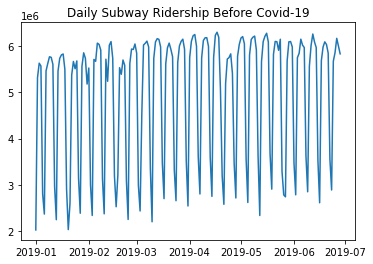

In [289]:
plt.plot(daily_totals_2019.date_final, daily_totals_2019.daily_entries)
plt.title('Daily Subway Ridership Before Covid-19')
#plt.savefig('/Users/melanieackerman/Metis/Week 2/ridership_plot.jpg')

In [290]:
daily_totals_2019.describe()

,daily_entries
count,1.790000e+02
mean,4.968296e+06
std,1.396078e+06
min,2.032667e+06
25%,3.496602e+06
50%,5.714278e+06
75%,6.013617e+06
max,6.291681e+06


In [291]:
# Moving Averages
daily_totals_2019['daily_MA'] = daily_totals_2019['daily_entries'].rolling(7).mean()
daily_totals_2020['daily_MA'] = daily_totals_2020['daily_entries'].rolling(7).mean()
daily_totals_2021['daily_MA'] = daily_totals_2021['daily_entries'].rolling(7).mean()

In [292]:
daily_totals_2019.head(10)

,date,daily_entries,date_final,month,daily_MA
0,01/01/2019,2032667.0,2019-01-01,January,NaN
1,01/02/2019,5313996.0,2019-01-02,January,NaN
2,01/03/2019,5625211.0,2019-01-03,January,NaN
3,01/04/2019,5563181.0,2019-01-04,January,NaN
4,01/05/2019,2814712.0,2019-01-05,January,NaN
5,01/06/2019,2374017.0,2019-01-06,January,NaN
6,01/07/2019,5459937.0,2019-01-07,January,4.169103e+06
7,01/08/2019,5617870.0,2019-01-08,January,4.681275e+06
8,01/09/2019,5762972.0,2019-01-09,January,4.745414e+06
9,01/10/2019,5751555.0,2019-01-10,January,4.763463e+06


In [293]:
# Check if any others are missing
daily_totals_2019.daily_MA.isna().describe() # only first 6 are missing

count       179
unique        2
top       False
freq        173
Name: daily_MA, dtype: object

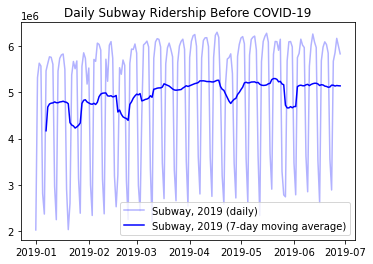

In [324]:
plt.plot(daily_totals_2019.date_final, daily_totals_2019.daily_entries, color='b', alpha=0.3)
plt.title('Daily Subway Ridership Before COVID-19')
plt.plot(daily_totals_2019.date_final, daily_totals_2019.daily_MA, color='b')
plt.legend(['Subway, 2019 (daily)', 'Subway, 2019 (7-day moving average)'], loc='lower right')
plt.savefig('/Users/melanieackerman/Metis/Project 1 MTA/subway_2019.jpg')

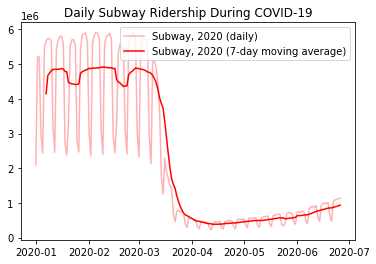

In [325]:
plt.plot(daily_totals_2020.date_final, daily_totals_2020.daily_entries, color='r', alpha=0.3)
plt.title('Daily Subway Ridership During COVID-19')
plt.plot(daily_totals_2020.date_final, daily_totals_2020.daily_MA, color='r')
plt.legend(['Subway, 2020 (daily)', 'Subway, 2020 (7-day moving average)'], loc='upper right')
plt.savefig('/Users/melanieackerman/Metis/Project 1 MTA/subway_2020.jpg')

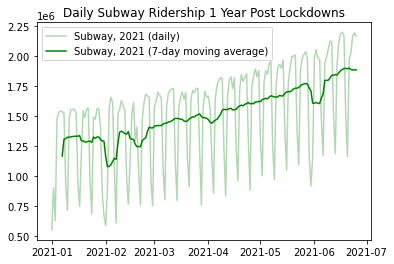

In [326]:
plt.plot(daily_totals_2021.date_final, daily_totals_2021.daily_entries, color='g', alpha=0.3)
plt.title('Daily Subway Ridership 1 Year Post Lockdowns')
plt.plot(daily_totals_2021.date_final, daily_totals_2021.daily_MA, color='g')
plt.legend(['Subway, 2021 (daily)', 'Subway, 2021 (7-day moving average)'], loc='upper left')
plt.savefig('/Users/melanieackerman/Metis/Project 1 MTA/subway_2021.jpg')

### Percent Changes

In [306]:
daily_totals_2019['day'] = daily_totals_2019['date_final'].apply(lambda r:r.day)
daily_totals_2019['month'] = daily_totals_2019['date_final'].apply(lambda r:r.month)
daily_totals_2019.head()

,date,daily_entries,date_final,month,daily_MA,day
0,01/01/2019,2032667.0,2019-01-01,1,NaN,1
1,01/02/2019,5313996.0,2019-01-02,1,NaN,2
2,01/03/2019,5625211.0,2019-01-03,1,NaN,3
3,01/04/2019,5563181.0,2019-01-04,1,NaN,4
4,01/05/2019,2814712.0,2019-01-05,1,NaN,5


In [307]:
daily_totals_2021['day'] = daily_totals_2021['date_final'].apply(lambda r:r.day)
daily_totals_2021['month'] = daily_totals_2021['date_final'].apply(lambda r:r.month)
daily_totals_2021.head()

,date,daily_entries,date_final,month,daily_MA,day
0,01/01/2021,550653.0,2021-01-01,1,NaN,1
1,01/02/2021,905073.0,2021-01-02,1,NaN,2
2,01/03/2021,627691.0,2021-01-03,1,NaN,3
3,01/04/2021,1481176.0,2021-01-04,1,NaN,4
4,01/05/2021,1533213.0,2021-01-05,1,NaN,5


In [308]:
daily_totals_2019['month'] = daily_totals_2019['month'].astype(str)
daily_totals_2019['day'] = daily_totals_2019['day'].astype(str)
daily_totals_2019['month_day'] = (daily_totals_2019['month'] + '-' + daily_totals_2019['day'])
daily_totals_2019.head()

,date,daily_entries,date_final,month,daily_MA,day,month_day
0,01/01/2019,2032667.0,2019-01-01,1,NaN,1,1-1
1,01/02/2019,5313996.0,2019-01-02,1,NaN,2,1-2
2,01/03/2019,5625211.0,2019-01-03,1,NaN,3,1-3
3,01/04/2019,5563181.0,2019-01-04,1,NaN,4,1-4
4,01/05/2019,2814712.0,2019-01-05,1,NaN,5,1-5


In [309]:
daily_totals_2021['month'] = daily_totals_2021['month'].astype(str)
daily_totals_2021['day'] = daily_totals_2021['day'].astype(str)
daily_totals_2021['month_day'] = (daily_totals_2021['month'] + '-' + daily_totals_2021['day'])
daily_totals_2021.head()

,date,daily_entries,date_final,month,daily_MA,day,month_day
0,01/01/2021,550653.0,2021-01-01,1,NaN,1,1-1
1,01/02/2021,905073.0,2021-01-02,1,NaN,2,1-2
2,01/03/2021,627691.0,2021-01-03,1,NaN,3,1-3
3,01/04/2021,1481176.0,2021-01-04,1,NaN,4,1-4
4,01/05/2021,1533213.0,2021-01-05,1,NaN,5,1-5


In [310]:
daily_totals_19_21 = pd.merge(daily_totals_2019, daily_totals_2021, on='month_day')
daily_totals_19_21.head()

,date_x,daily_entries_x,date_final_x,month_x,daily_MA_x,day_x,month_day,date_y,daily_entries_y,date_final_y,month_y,daily_MA_y,day_y
0,01/01/2019,2032667.0,2019-01-01,1,NaN,1,1-1,01/01/2021,550653.0,2021-01-01,1,NaN,1
1,01/02/2019,5313996.0,2019-01-02,1,NaN,2,1-2,01/02/2021,905073.0,2021-01-02,1,NaN,2
2,01/03/2019,5625211.0,2019-01-03,1,NaN,3,1-3,01/03/2021,627691.0,2021-01-03,1,NaN,3
3,01/04/2019,5563181.0,2019-01-04,1,NaN,4,1-4,01/04/2021,1481176.0,2021-01-04,1,NaN,4
4,01/05/2019,2814712.0,2019-01-05,1,NaN,5,1-5,01/05/2021,1533213.0,2021-01-05,1,NaN,5


In [313]:
def get_pct_change(row):
    pct_chng = (row['daily_entries_y'] - row['daily_entries_x'])/row['daily_entries_x']
    return pct_chng
                                                                     
daily_totals_19_21['pct_chng'] = daily_totals_19_21.apply(get_pct_change, axis=1)
daily_totals_19_21.head()

,date_x,daily_entries_x,date_final_x,month_x,daily_MA_x,day_x,month_day,date_y,daily_entries_y,date_final_y,month_y,daily_MA_y,day_y,pct_chng
0,01/01/2019,2032667.0,2019-01-01,1,NaN,1,1-1,01/01/2021,550653.0,2021-01-01,1,NaN,1,-0.729098
1,01/02/2019,5313996.0,2019-01-02,1,NaN,2,1-2,01/02/2021,905073.0,2021-01-02,1,NaN,2,-0.829681
2,01/03/2019,5625211.0,2019-01-03,1,NaN,3,1-3,01/03/2021,627691.0,2021-01-03,1,NaN,3,-0.888415
3,01/04/2019,5563181.0,2019-01-04,1,NaN,4,1-4,01/04/2021,1481176.0,2021-01-04,1,NaN,4,-0.733754
4,01/05/2019,2814712.0,2019-01-05,1,NaN,5,1-5,01/05/2021,1533213.0,2021-01-05,1,NaN,5,-0.455286


In [314]:
import numpy as np

In [315]:
# Create column of zeros for the graph
daily_totals_19_21['zeros'] = daily_totals_19_21['date_final_x'].isna()
daily_totals_19_21.head()

,date_x,daily_entries_x,date_final_x,month_x,daily_MA_x,day_x,month_day,date_y,daily_entries_y,date_final_y,month_y,daily_MA_y,day_y,pct_chng,zeros
0,01/01/2019,2032667.0,2019-01-01,1,NaN,1,1-1,01/01/2021,550653.0,2021-01-01,1,NaN,1,-0.729098,False
1,01/02/2019,5313996.0,2019-01-02,1,NaN,2,1-2,01/02/2021,905073.0,2021-01-02,1,NaN,2,-0.829681,False
2,01/03/2019,5625211.0,2019-01-03,1,NaN,3,1-3,01/03/2021,627691.0,2021-01-03,1,NaN,3,-0.888415,False
3,01/04/2019,5563181.0,2019-01-04,1,NaN,4,1-4,01/04/2021,1481176.0,2021-01-04,1,NaN,4,-0.733754,False
4,01/05/2019,2814712.0,2019-01-05,1,NaN,5,1-5,01/05/2021,1533213.0,2021-01-05,1,NaN,5,-0.455286,False


In [316]:
# Create moving average
daily_totals_19_21['pct_chng_MA'] = daily_totals_19_21['pct_chng'].rolling(7).mean()

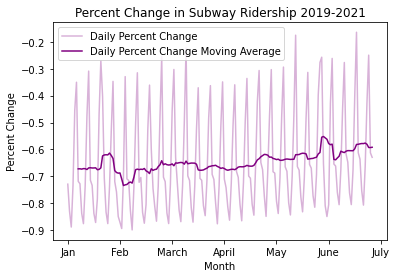

In [331]:
plt.plot(daily_totals_19_21.month_day, daily_totals_19_21.pct_chng, color='purple', alpha=0.3)
plt.xticks(np.arange(0, len(daily_totals_19_21.month_day)+5, 30), ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July'])
plt.plot(daily_totals_19_21.month_day, daily_totals_19_21.pct_chng_MA, color='purple')
#plt.plot(daily_totals_19_21.month_day, daily_totals_19_21.zeros, linestyle='--')
plt.xlabel('Month')
plt.ylabel('Percent Change')
plt.title('Percent Change in Subway Ridership 2019-2021')
plt.legend(['Daily Percent Change', 'Daily Percent Change Moving Average'], loc='upper left')
plt.savefig('/Users/melanieackerman/Metis/Project 1 MTA/subway_pctchng.jpg')